<a href="https://colab.research.google.com/github/tasmimjoti/Machine-Learning-in-Business/blob/main/Financial_Risk_using_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI-Powered Predictive Analytics for Financial Risk Management in U.S. Markets/Financial_risk_assessment.csv")

In [ ]:
df.shape

(20000, 36)

In [ ]:
df.head()

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.724972         11    126928   
1    3309.083333                   0.935132          3     43609   
2    3393.666667                   0.872241          6      5205   
3    5757.000000                   0.896155          5     99452   
4    8605.333333                   0.941369          5    227019   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.199652      0.227590          419.805992                0.181077   
1          0.207045      0.201077          794.054238                0.389852   
2          0.217627      0.212548          666.406688                0.462157   
3          0.300398      0.300911         1047.506980                0.313098   
4          0.197184      0.175990          330.179140                0.070210   

  LoanApproved  RiskScore  
0            0       49.0  
1            0       52.0  
2            0       52.0  
3            0       54.0  
4            1       36.0  

[5 rows x 36 columns]

In [ ]:
print("Data Description:")
print(df.describe())
print("\nData Info:")
print(df.info())

Data Description:
                Age   AnnualIncome   CreditScore    Experience     LoanAmount  \
count  20000.000000   20000.000000  20000.000000  20000.000000   20000.000000   
mean      39.752600   59161.473550    571.612400     17.522750   24882.867800   
std       11.622713   40350.845168     50.997358     11.316836   13427.421217   
min       18.000000   15000.000000    343.000000      0.000000    3674.000000   
25%       32.000000   31679.000000    540.000000      9.000000   15575.000000   
50%       40.000000   48566.000000    578.000000     17.000000   21914.500000   
75%       48.000000   74391.000000    609.000000     25.000000   30835.000000   
max       80.000000  485341.000000    712.000000     61.000000  184732.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count  20000.000000        20000.000000         20000.000000   
mean      54.057000            1.517300           454.292700   
std       24.664857            1.386325           240.507609

In [ ]:
df = df.drop(columns=['ApplicationDate'])

In [ ]:
df.head()

Age  AnnualIncome  CreditScore EmploymentStatus EducationLevel  Experience  \
0   45         39948          617         Employed         Master          22   
1   38         39709          628         Employed      Associate          15   
2   47         40724          570         Employed       Bachelor          26   
3   58         69084          545         Employed    High School          34   
4   37        103264          594         Employed      Associate          17   

   LoanAmount  LoanDuration MaritalStatus  NumberOfDependents  ...  \
0       13152            48       Married                   2  ...   
1       26045            48        Single                   1  ...   
2       17627            36       Married                   2  ...   
3       37898            96        Single                   1  ...   
4        9184            36       Married                   1  ...   

  MonthlyIncome  UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0   3329.000000                    0.724972         11    126928   
1   3309.083333                    0.935132          3     43609   
2   3393.666667                    0.872241          6      5205   
3   5757.000000                    0.896155          5     99452   
4   8605.333333                    0.941369          5    227019   

   BaseInterestRate  InterestRate  MonthlyLoanPayment TotalDebtToIncomeRatio  \
0          0.199652      0.227590          419.805992               0.181077   
1          0.207045      0.201077          794.054238               0.389852   
2          0.217627      0.212548          666.406688               0.462157   
3          0.300398      0.300911         1047.506980               0.313098   
4          0.197184      0.175990          330.179140               0.070210   

   LoanApproved  RiskScore  
0             0       49.0  
1             0       52.0  
2             0       52.0  
3             0       54.0  
4             1       36.0  

[5 rows x 35 columns]

In [ ]:
df.isnull().sum()

Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyLoanPayment            0
TotalDebtToIncomeRatio        0
LoanApproved                  0
RiskScore                     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
print(df.nunique(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  object 
 4   EducationLevel              20000 non-null  object 
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  object 
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  object 
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

In [ ]:
columns_to_encode = ['EmploymentStatus', 'HomeOwnershipStatus', 'EducationLevel', 'MaritalStatus', 'LoanPurpose']

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Encoding each specified column in place
for column in columns_to_encode:
    if column in df.columns:  # Ensure the column exists
        df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head(50)

Age  AnnualIncome  CreditScore  EmploymentStatus  EducationLevel  \
0    45         39948          617                 0               4   
1    38         39709          628                 0               0   
2    47         40724          570                 0               1   
3    58         69084          545                 0               3   
4    37        103264          594                 0               0   
5    37        178310          626                 1               4   
6    58         51250          564                 0               3   
7    49         97345          516                 0               3   
8    34        116841          603                 0               1   
9    46         40615          612                 0               0   
10   34         73646          478                 0               0   
11   34         15000          591                 0               1   
12   42         74453          573                 0               1   
13   18        100508          580                 0               0   
14   19         47624          597                 0               1   
15   33         56650          605                 0               2   
16   27         50042          582                 0               2   
17   43        142326          644                 0               1   
18   29         16021          553                 0               3   
19   23         34698          594                 0               0   
20   57        106749          630                 0               4   
21   37         59138          594                 0               0   
22   40        114216          635                 0               2   
23   22         63300          503                 0               0   
24   33         39676          555                 0               4   
25   41         59192          594                 2               3   
26   26         15059          462                 0               0   
27   44         15305          608                 1               1   
28   32         35498          622                 0               4   
29   36         60227          576                 0               1   
30   32         23861          592                 1               3   
31   62         73843          667                 2               4   
32   39         61099          559                 0               1   
33   27         15000          535                 0               3   
34   49         34738          520                 0               0   
35   25         85889          571                 0               1   
36   42         78701          552                 0               0   
37   18         24914          604                 0               4   
38   24         57231          508                 2               0   
39   42        163303          655                 1               1   
40   48         38453          595                 2               3   
41   42         99920          582                 1               1   
42   38         57860          591                 0               3   
43   36         30890          590                 0               3   
44   22         15561          500                 0               3   
45   31        105957          530                 0               3   
46   34         82887          545                 0               3   
47   52         53555          631                 0               0   
48   44        105639          627                 0               3   
49   18         58342          519                 0               3   

    Experience  LoanAmount  LoanDuration  MaritalStatus  NumberOfDependents  \
0           22       13152            48              1                   2   
1           15       26045            48              2                   1   
2           26       17627            36              1                   2   
3           34 

In [ ]:
df.shape

(20000, 35)

In [ ]:
X = df.drop(columns=['RiskScore'])
y = df['RiskScore']
X = pd.get_dummies(X, drop_first=True)

**Correlation Heatmap**

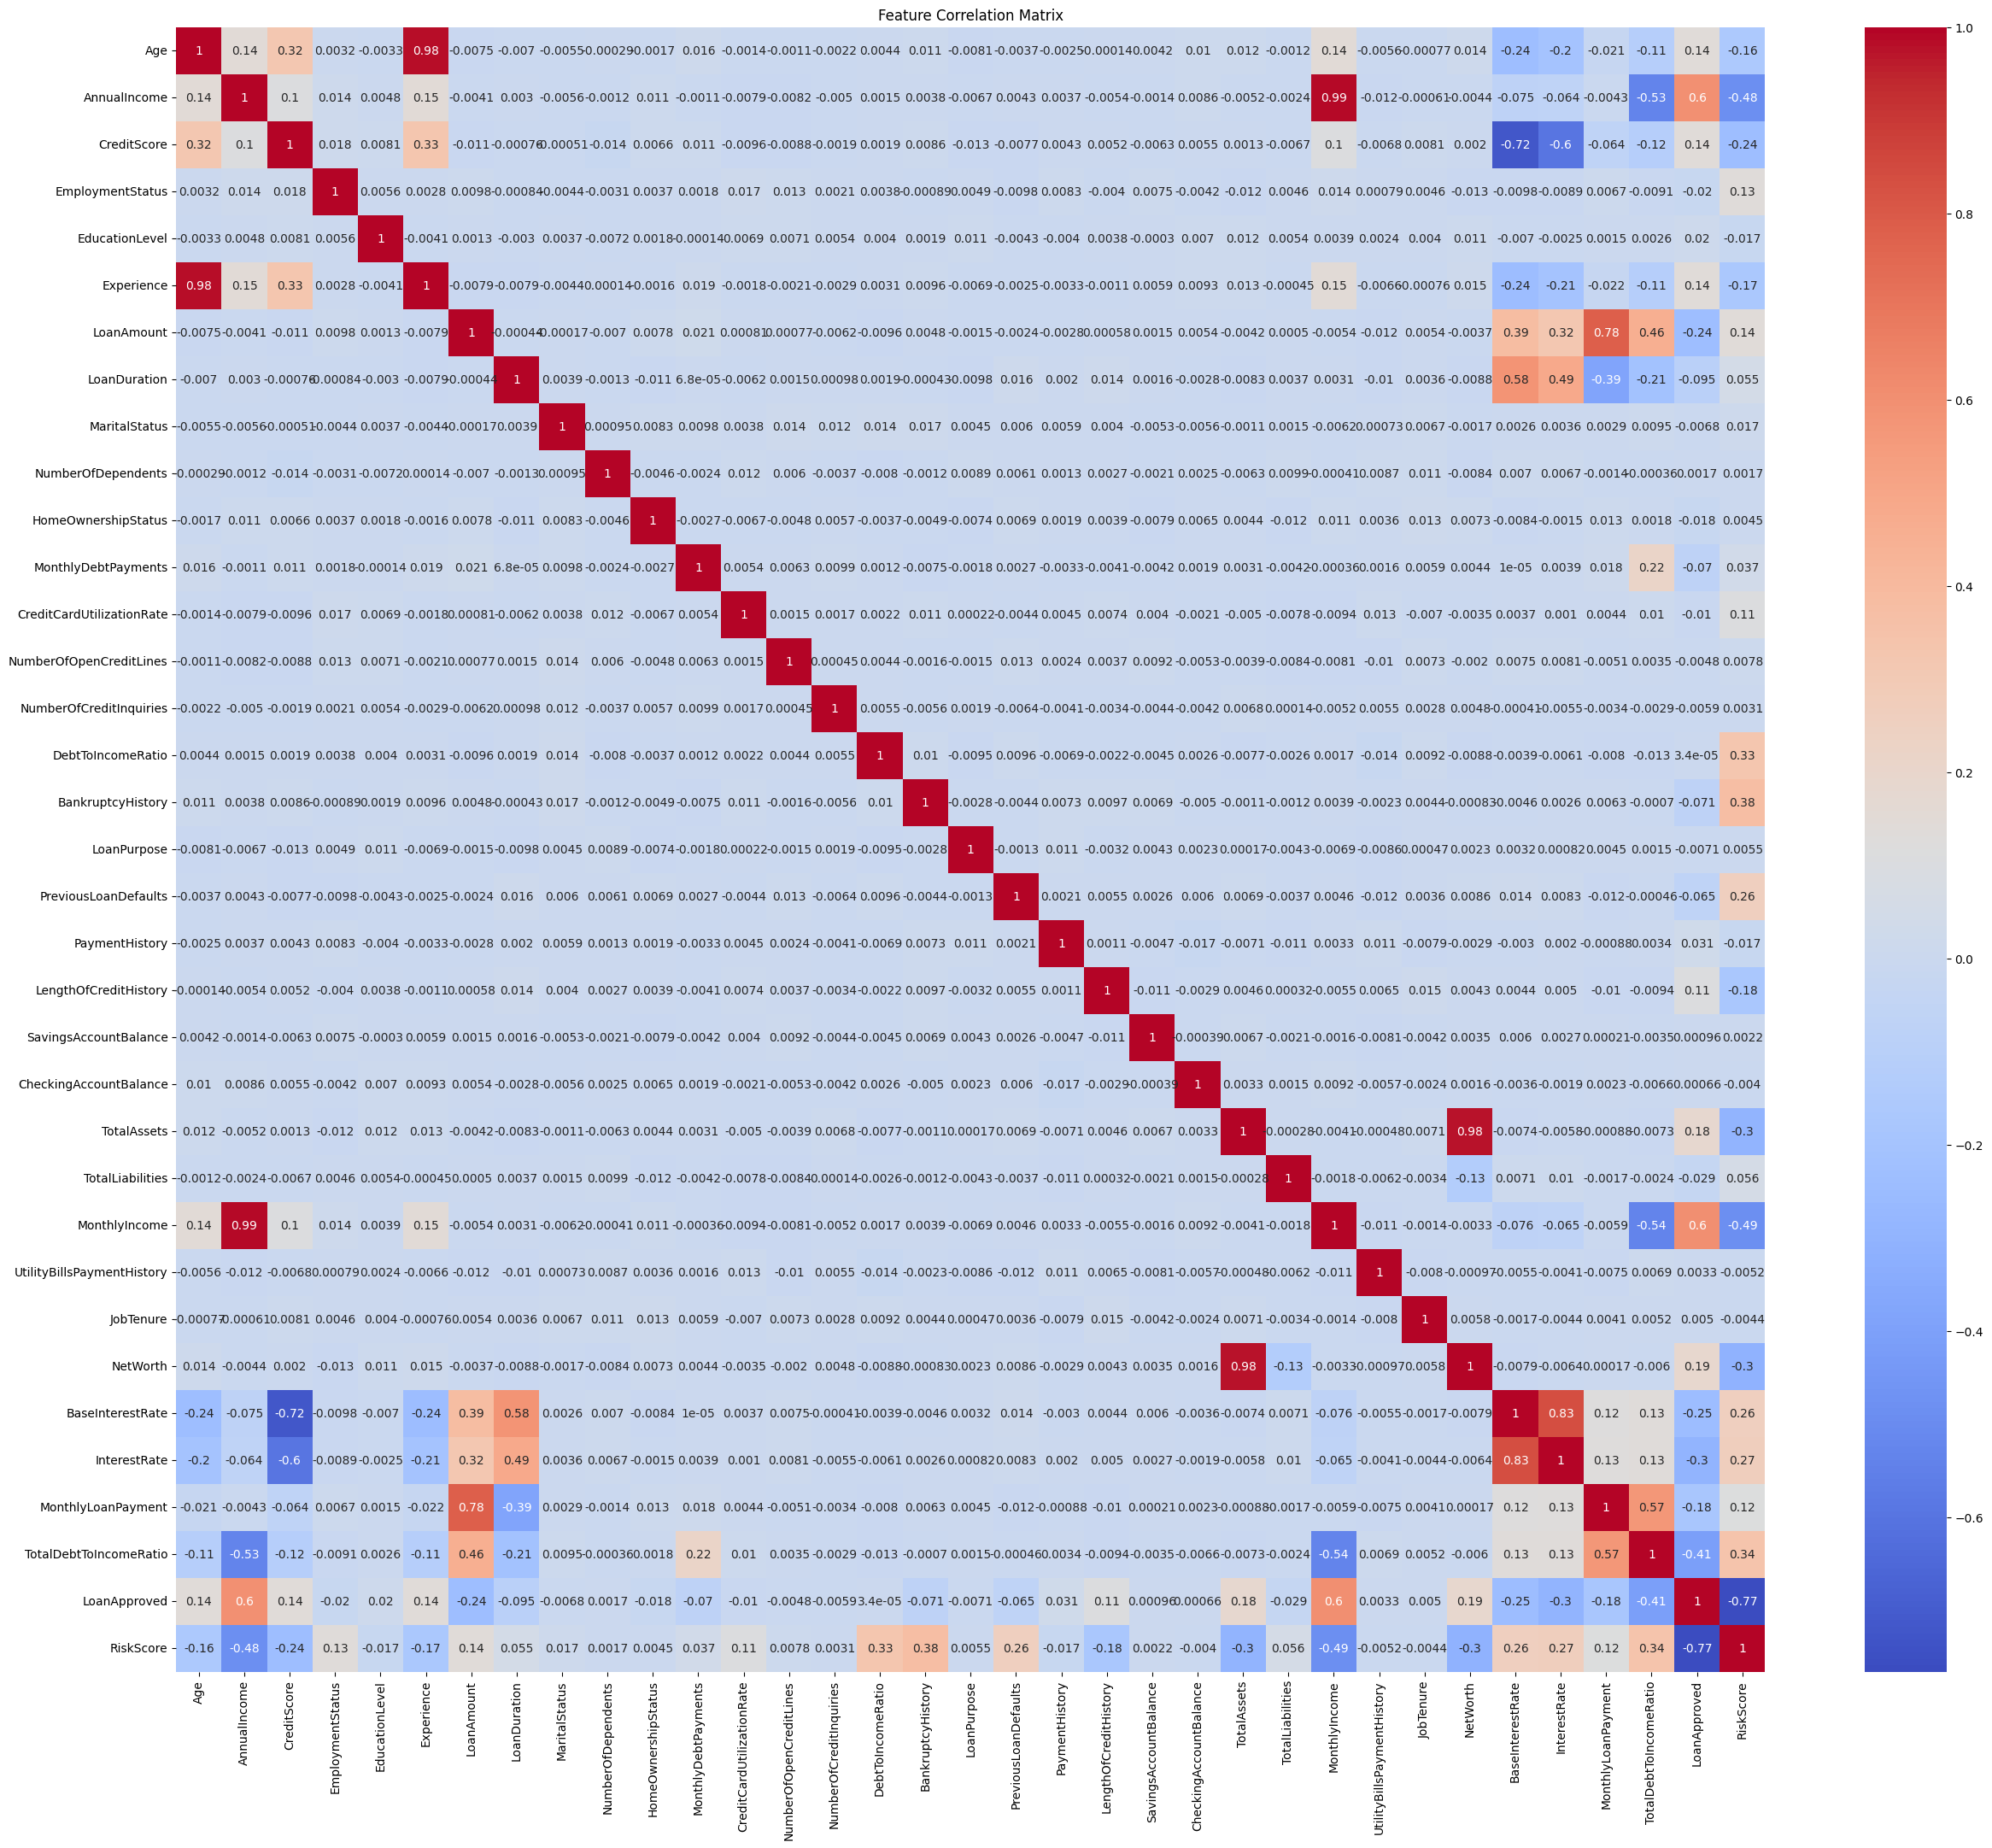

In [ ]:
plt.figure(figsize=(30, 25))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

**PCA Analysis**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

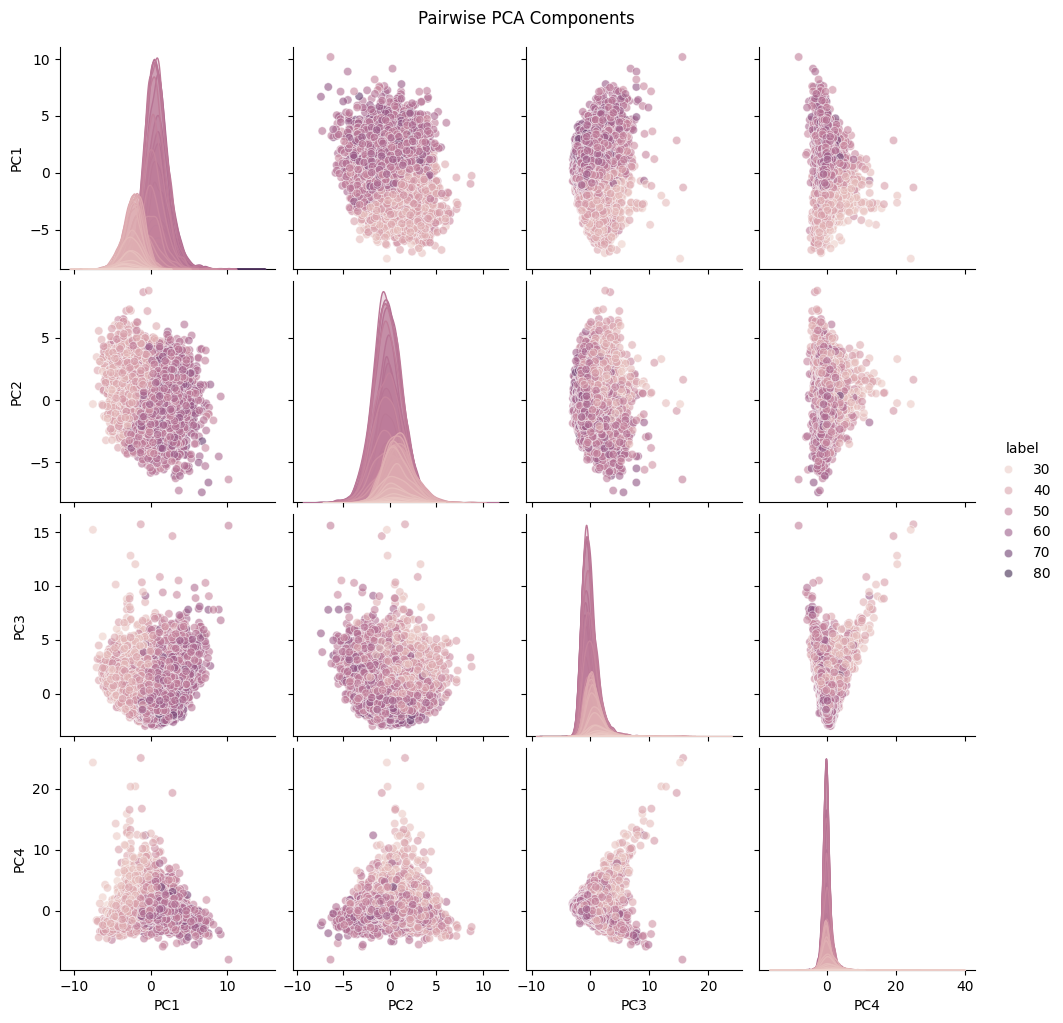

In [ ]:
n_components = 4  # Number of components you want to plot
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components and the target labels
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['label'] = y  # Add the target variable for color-coding

# Pairplot of PCA components with hue based on target labels
sns.pairplot(pca_df, hue='label', plot_kws={'alpha':0.6})
plt.suptitle("Pairwise PCA Components", y=1.02)  # Adjust y to position the title properly
plt.show()

**Boxplot**

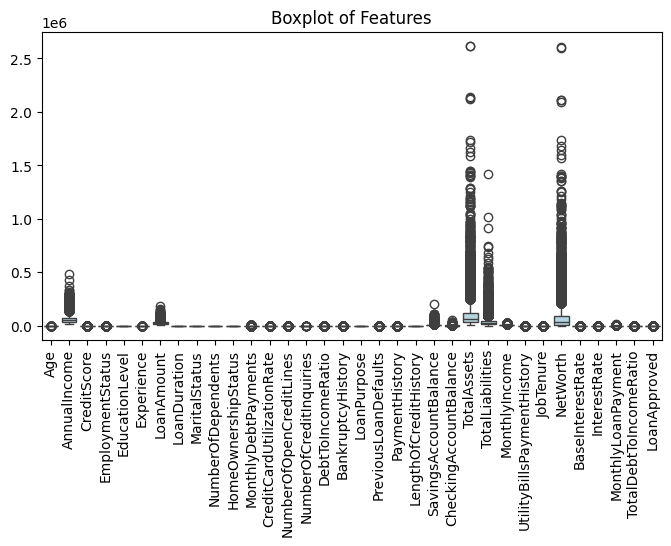

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=X, color="lightblue")
plt.title("Boxplot of Features")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

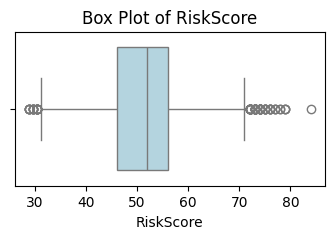

In [ ]:
plt.figure(figsize=(4, 2))
sns.boxplot(x=y, color="lightblue")
plt.title("Box Plot of RiskScore")  # Set the title directly
plt.xlabel("RiskScore")  # Set the x-axis label directly
plt.show()

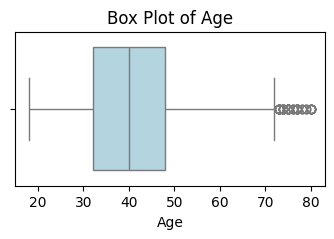

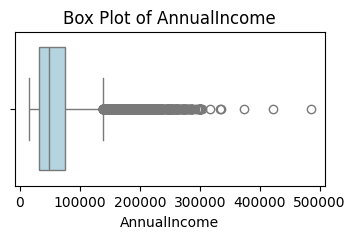

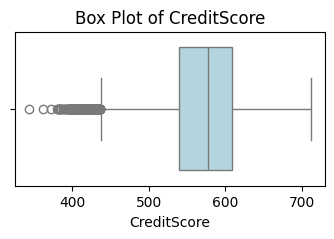

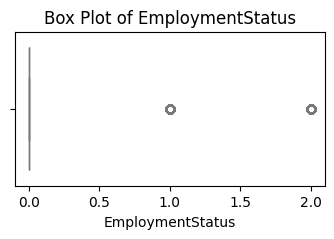

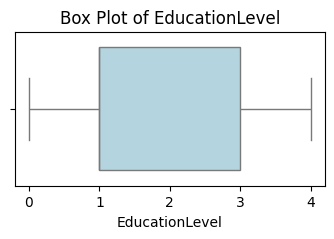

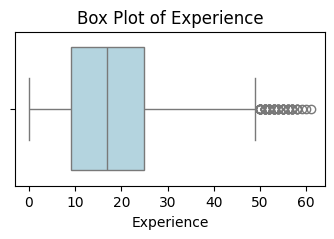

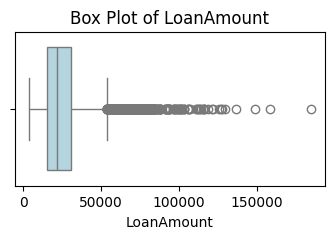

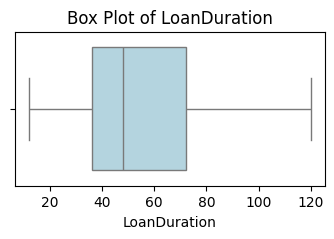

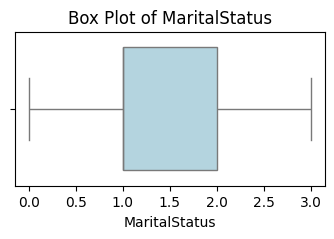

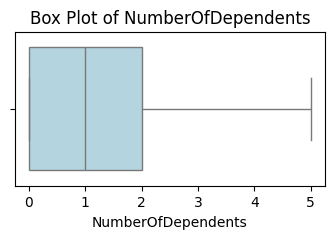

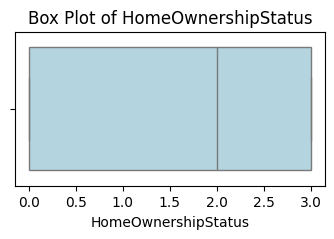

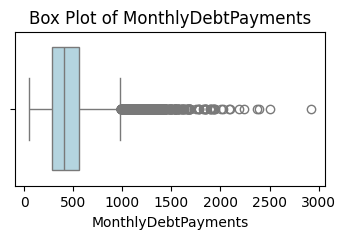

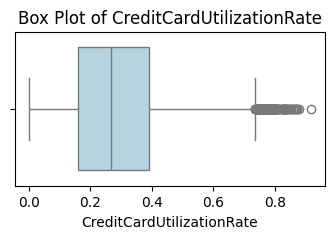

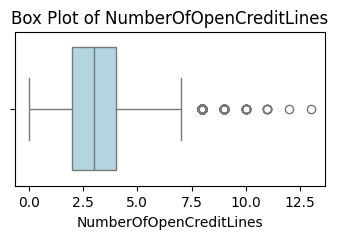

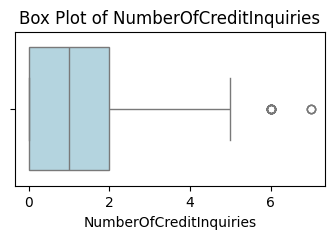

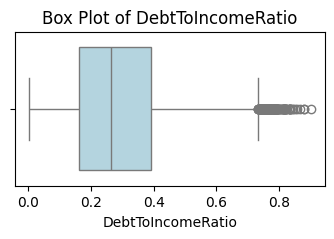

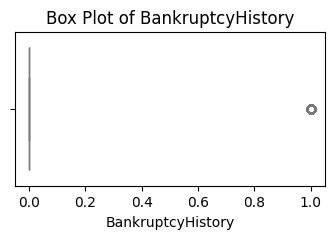

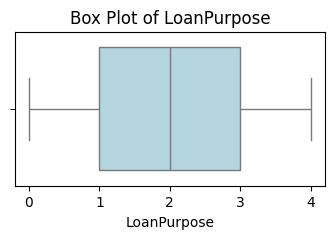

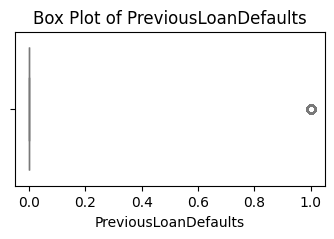

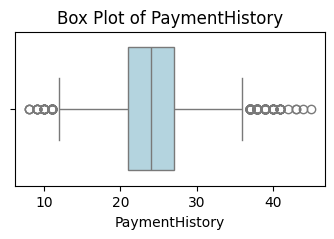

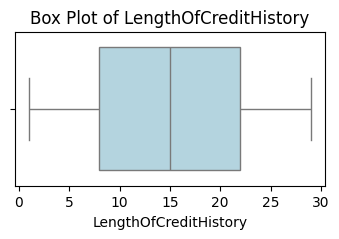

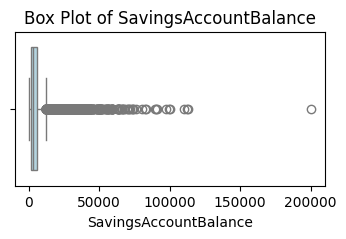

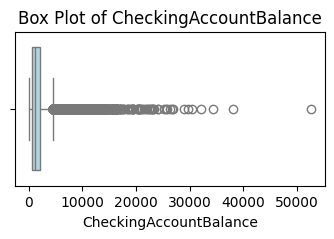

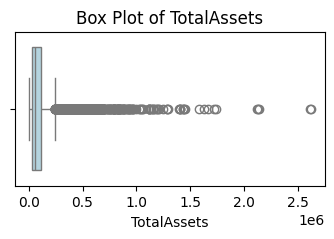

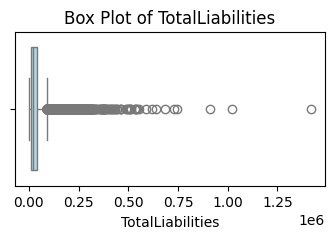

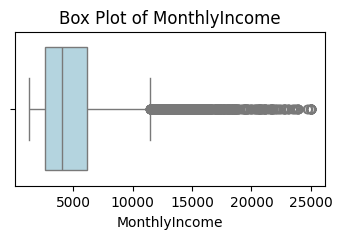

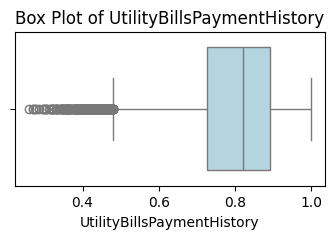

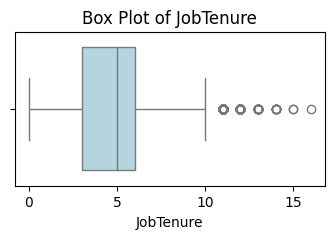

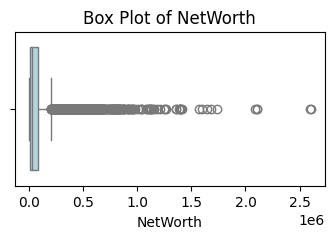

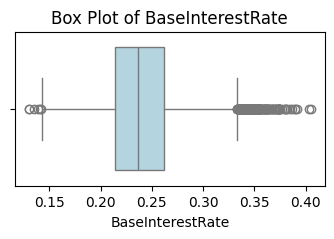

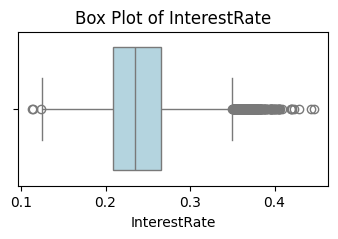

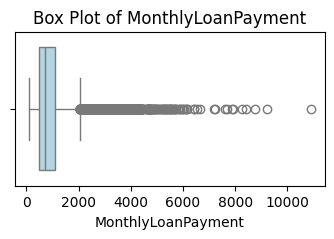

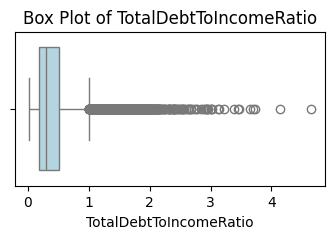

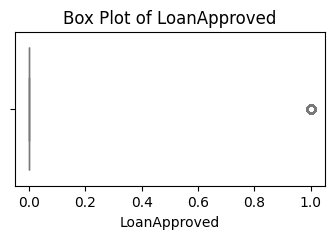

In [ ]:
for column in X.columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=X[column], color="lightblue")
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
    plt.show()

**Target Distribution**

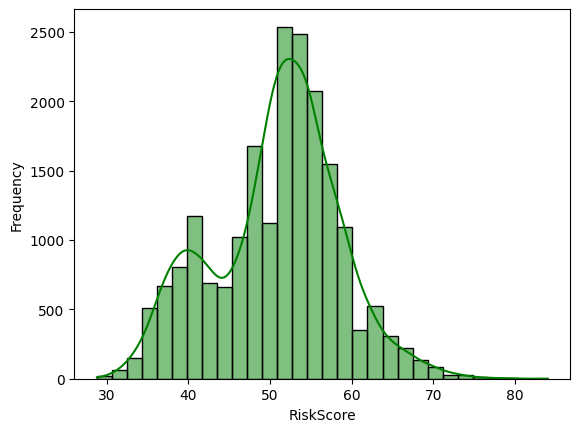

In [ ]:
sns.histplot(y, kde=True, bins=30, color="green")
plt.xlabel("RiskScore")
plt.ylabel("Frequency")
plt.show()

**Splitting data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Checking if the target data is balanced
print(df['RiskScore'].value_counts())

RiskScore
52.0    1267
51.0    1254
53.0    1248
54.0    1224
55.0    1155
        ... 
54.4       2
78.0       2
39.0       2
84.0       1
38.0       1
Name: count, Length: 73, dtype: int64


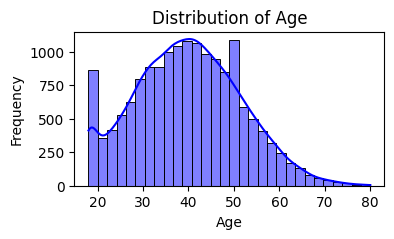

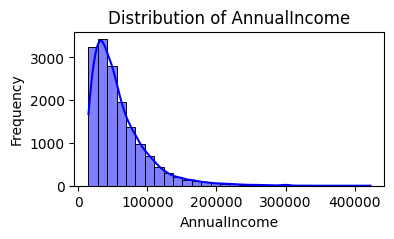

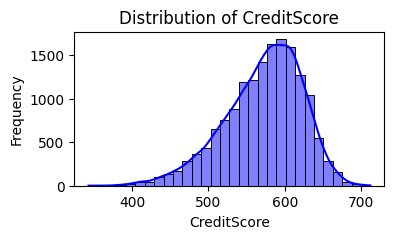

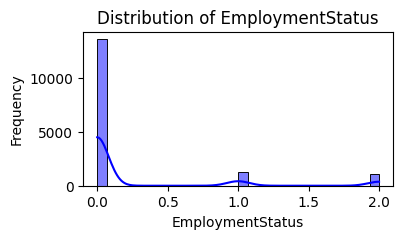

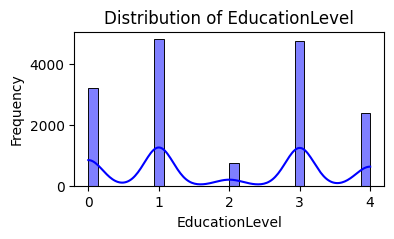

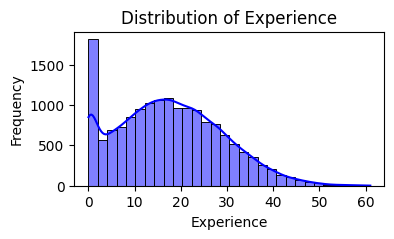

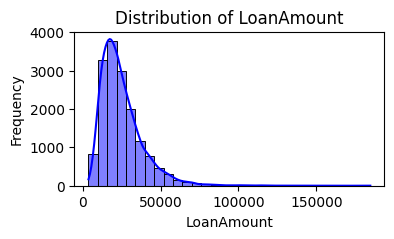

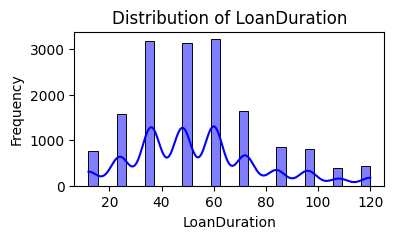

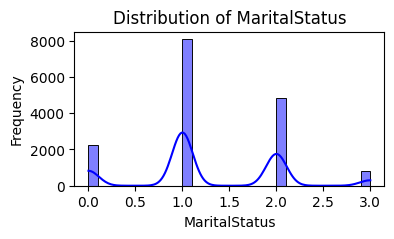

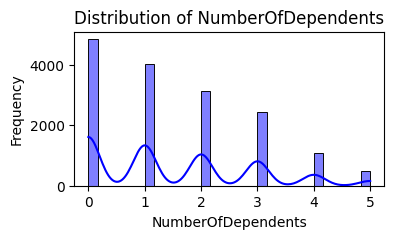

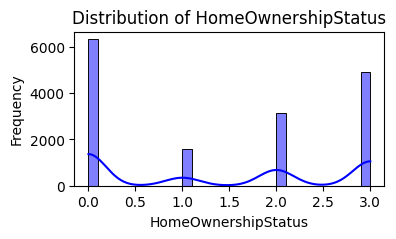

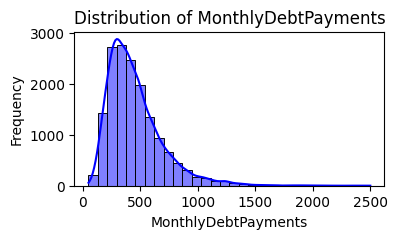

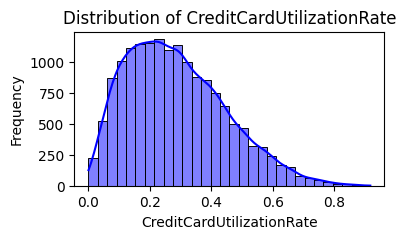

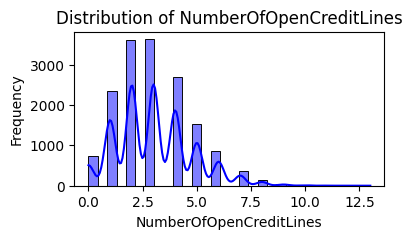

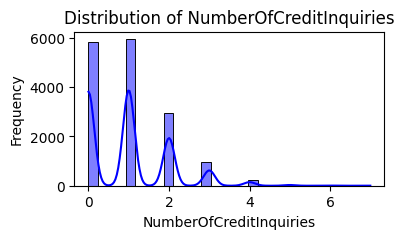

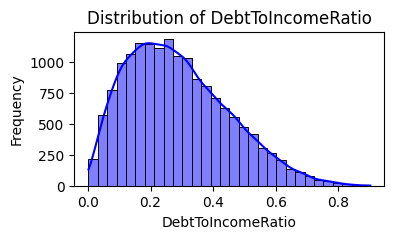

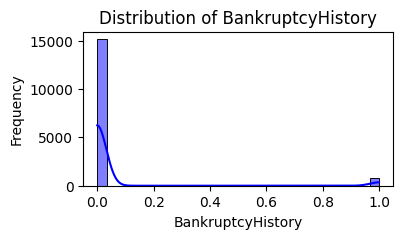

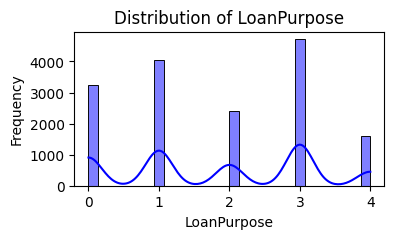

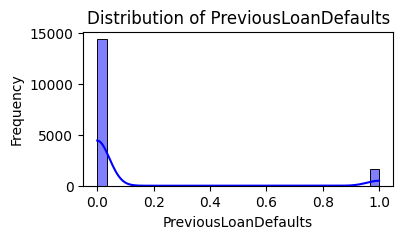

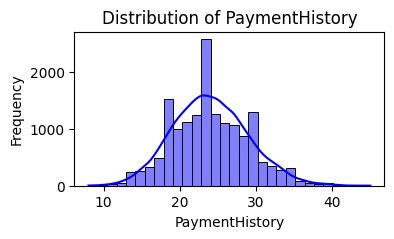

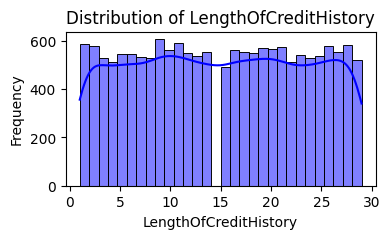

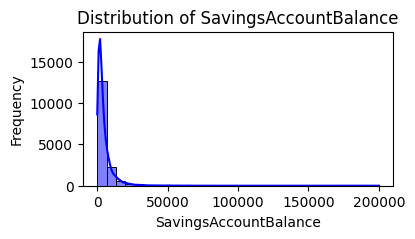

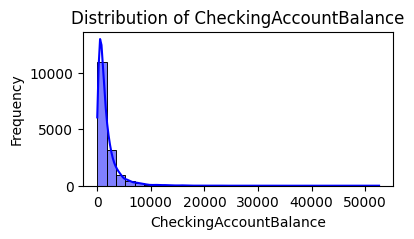

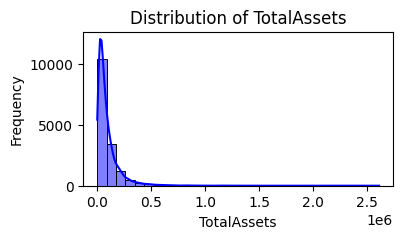

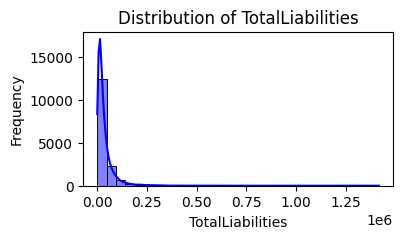

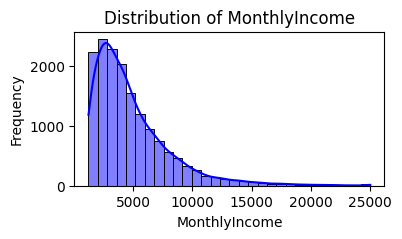

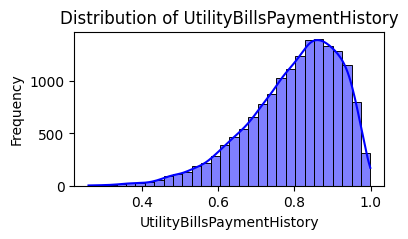

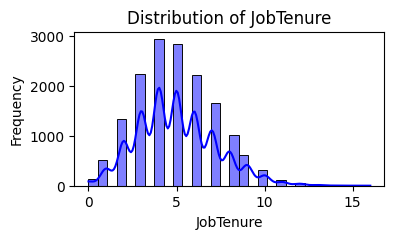

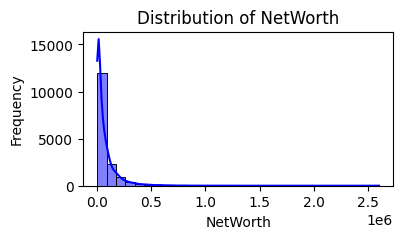

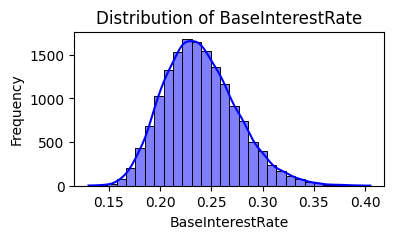

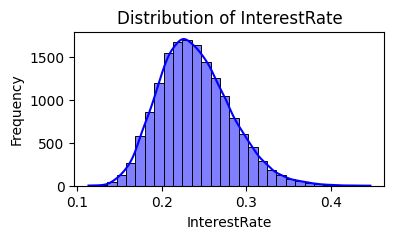

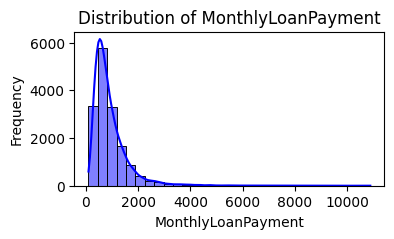

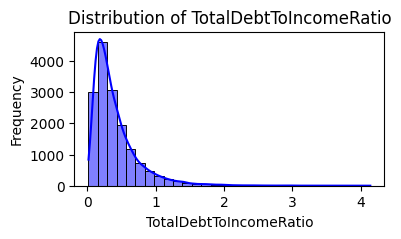

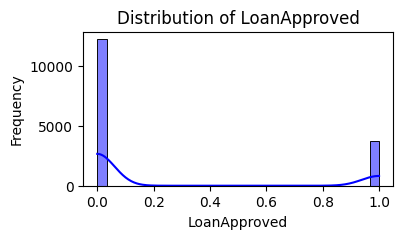

In [ ]:
for column in X_train.columns:
    plt.figure(figsize=(4, 2))
    sns.histplot(X_train[column], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

**Model Initialization & Evaluation**

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel='rbf'),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}

# Evaluate each model
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Display Results
results_df = pd.DataFrame(results).T  # Transpose for better visualization
print("\nPerformance Metrics:")
print(results_df)

Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Random Forest...
Training Support Vector Regression...
Training XGBoost...
Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4599
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 34
[LightGBM] [Info] Start training from score 50.843600
Training CatBoost...

Performance Metrics:
                                MAE        MSE      RMSE  R2 Score
Linear Regression          1.526113   4.061483  2.015312  0.934584
Ridge Regression           1.526084   4.061736  2.015375  0.934580
Lasso Regression           1.768599   5.392908  2.322264  0.913140
Random Forest              0.589641   0.881158  0.938700  0.985808
Support Vector Regress

**Actual VS Predicted plotting**

Generating plot for Linear Regression...


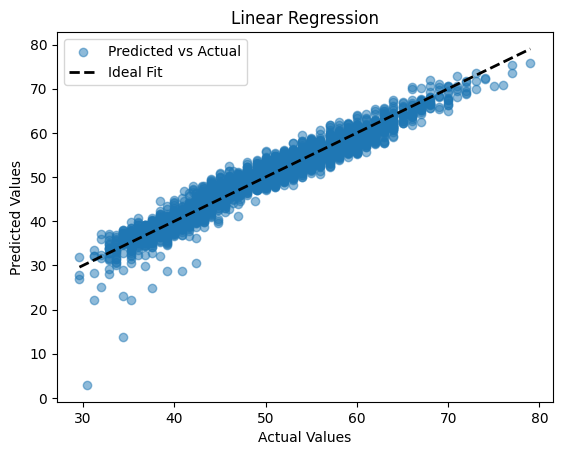

Generating plot for Ridge Regression...


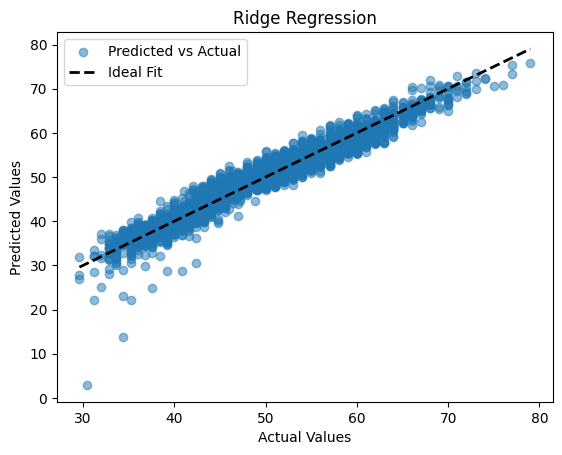

Generating plot for Lasso Regression...


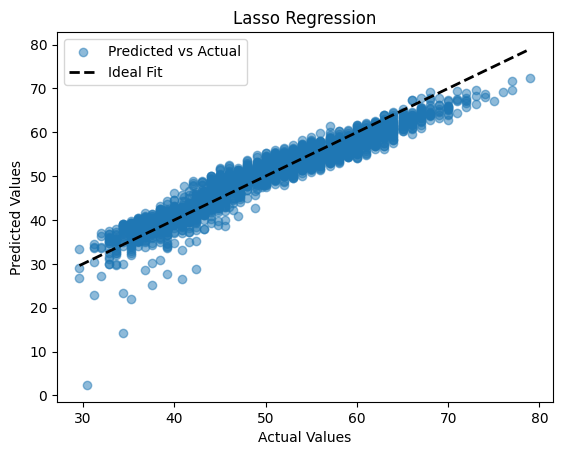

Generating plot for Random Forest...


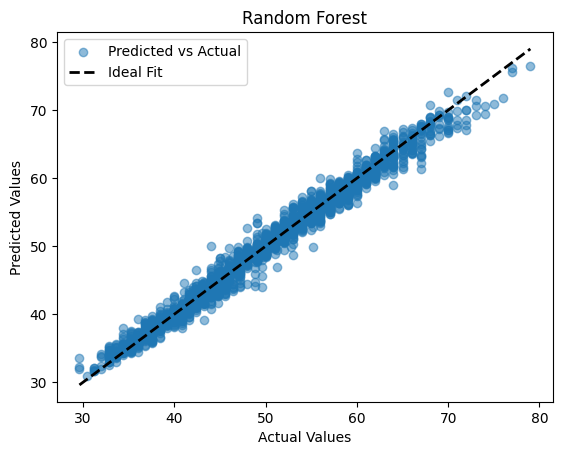

Generating plot for Support Vector Regression...


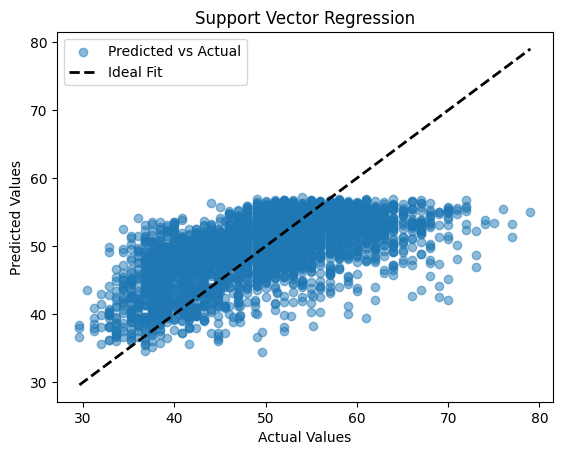

Generating plot for XGBoost...


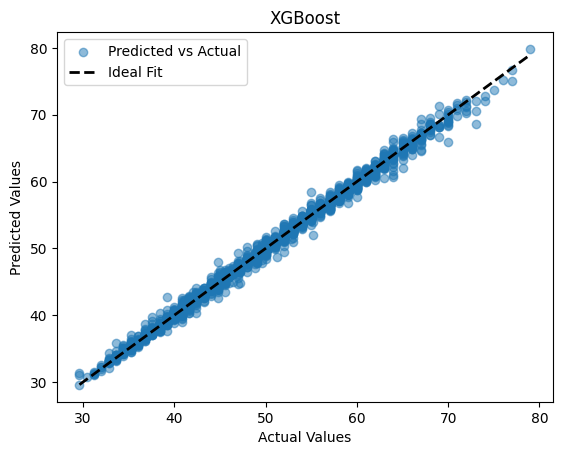

Generating plot for LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4599
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 34
[LightGBM] [Info] Start training from score 50.843600


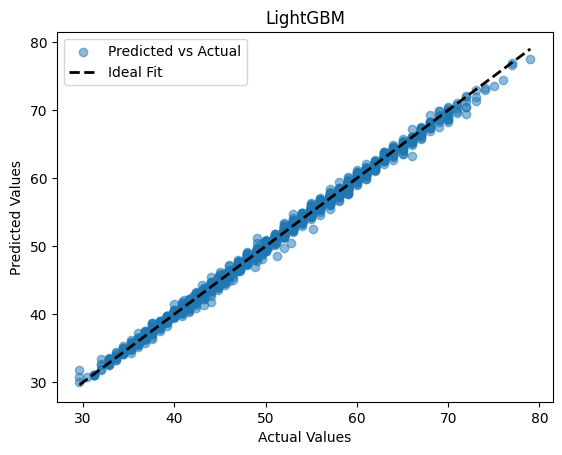

Generating plot for CatBoost...


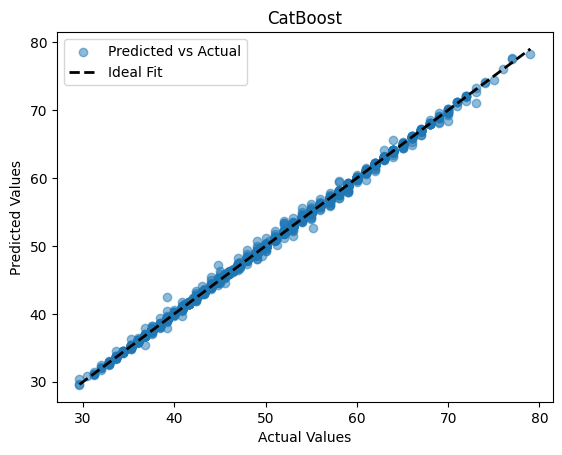

In [ ]:
def plot_predicted_vs_actual(y_test, y_pred, model_name):
    plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Fit")
    plt.title(f'{model_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Loop through each model, train, predict, and plot
for name, model in models.items():
    print(f"Generating plot for {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_predicted_vs_actual(y_test, y_pred, name)

**Feature Importance**

Generating feature importance for Linear Regression...


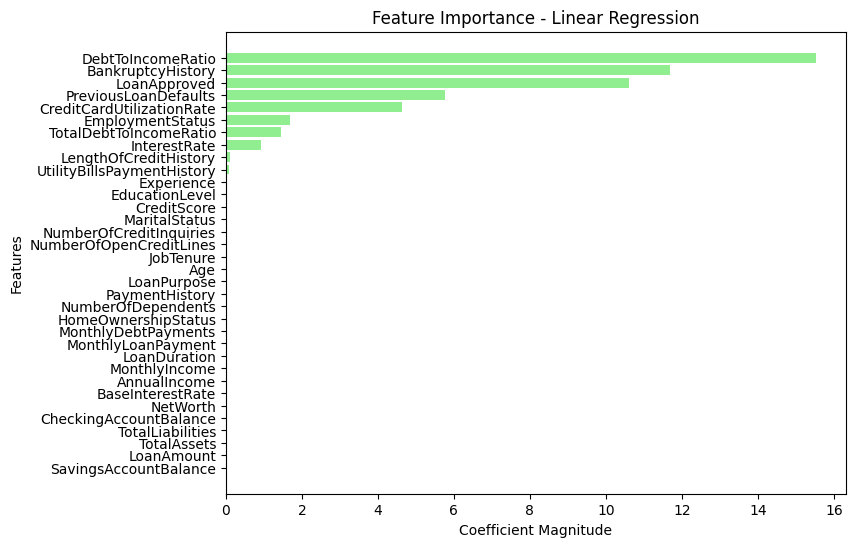

Generating feature importance for Ridge Regression...


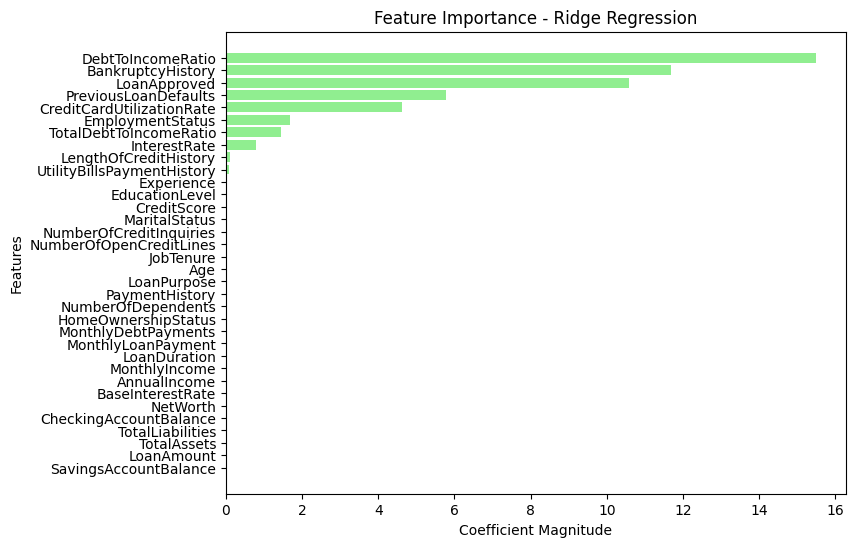

Generating feature importance for Lasso Regression...


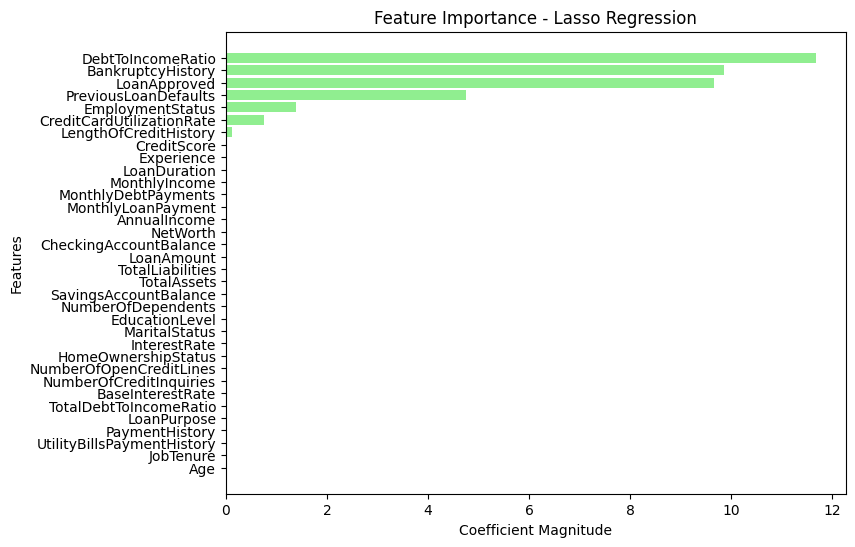

Generating feature importance for Random Forest...


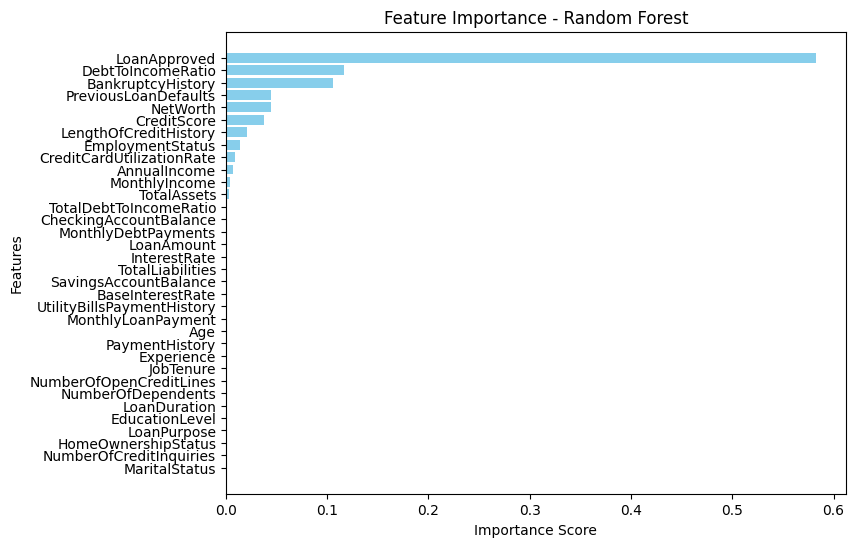

Generating feature importance for Support Vector Regression...
Support Vector Regression does not support feature importance visualization.
Generating feature importance for XGBoost...


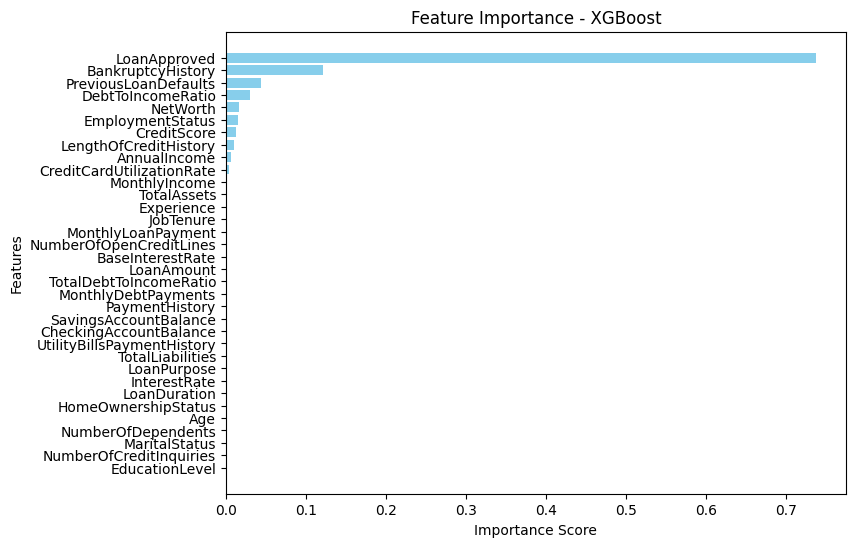

Generating feature importance for LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4599
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 34
[LightGBM] [Info] Start training from score 50.843600


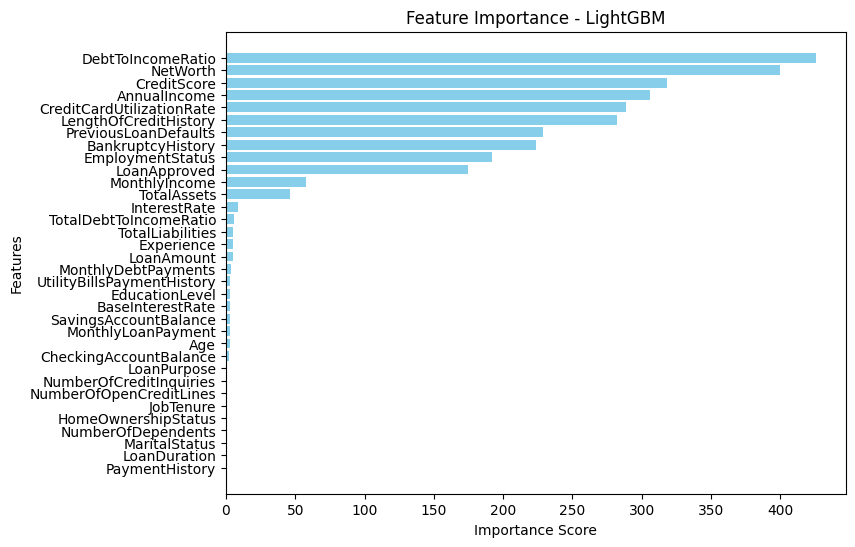

Generating feature importance for CatBoost...


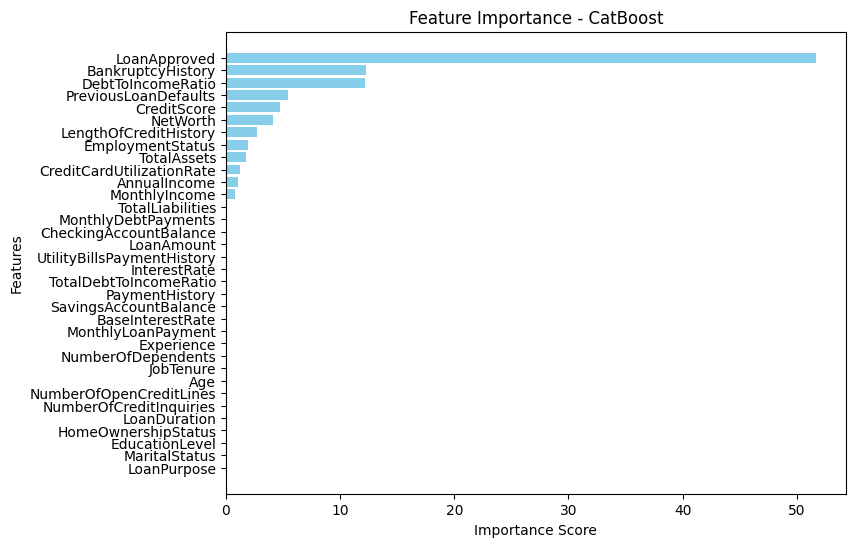

In [ ]:
if isinstance(X_train, np.ndarray):  # Convert to DataFrame if needed
    feature_names = [f"Feature {i+1}" for i in range(X_train.shape[1])]
    X_train = pd.DataFrame(X_train, columns=feature_names)

# Extract feature names from the DataFrame
feature_names = X_train.columns

# Updated feature importance visualization function
def plot_feature_importance(model, feature_names, model_name):
    if hasattr(model, "coef_"):  # Linear models
        importance = np.abs(model.coef_)
        sorted_idx = np.argsort(importance)[::-1]
        sorted_importance = importance[sorted_idx]
        sorted_features = [feature_names[i] for i in sorted_idx]

        plt.figure(figsize=(8, 6))
        plt.barh(sorted_features, sorted_importance, color="lightgreen")
        plt.title(f'Feature Importance - {model_name}')
        plt.xlabel('Coefficient Magnitude')
        plt.ylabel('Features')
        plt.gca().invert_yaxis()
        plt.show()

    elif hasattr(model, "feature_importances_"):  # Tree-based models
        importance = model.feature_importances_
        sorted_idx = np.argsort(importance)[::-1]
        sorted_importance = importance[sorted_idx]
        sorted_features = [feature_names[i] for i in sorted_idx]

        plt.figure(figsize=(8, 6))
        plt.barh(sorted_features, sorted_importance, color="skyblue")
        plt.title(f'Feature Importance - {model_name}')
        plt.xlabel('Importance Score')
        plt.ylabel('Features')
        plt.gca().invert_yaxis()
        plt.show()

    else:
        print(f"{model_name} does not support feature importance visualization.")

# Loop through all models to plot feature importance
for name, model in models.items():
    print(f"Generating feature importance for {name}...")
    model.fit(X_train, y_train)
    plot_feature_importance(model, feature_names, name)